<a href="https://colab.research.google.com/github/bhadaur1/Chollet/blob/master/Chollet_Chap3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear Regression using Boston Housing dataset

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import boston_housing

In [3]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [4]:
train_data.shape

(404, 13)

In [5]:
def prepare_data(train_data, train_targets, test_data, test_targets):

  def normalize_dataset(dataset, mean=None, std=None):
    dataset = dataset.copy()
    if mean is None and std is None:
      mean = np.mean(dataset, axis=0)
      std = np.std(dataset, axis=0)
    dataset = (dataset - mean) / std
    return dataset, mean, std

  x_train, train_mean, train_std = normalize_dataset(train_data)
  y_train = train_targets.copy()

  x_test, _, _ = normalize_dataset(test_data, train_mean, train_std)
  y_test = test_targets.copy()

  return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = prepare_data(train_data, train_targets, test_data, test_targets)

In [6]:
%%time
def model_training(epochs=1):
  from keras import models, layers
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))

  model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['mae'])

  history = model.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_split=0.111)
  results = model.evaluate(x_test, y_test)
  return model, history, results

model, history, test_eval_results = model_training(20)

Epoch 1/20
12/12 [==============================] - 0s 13ms/step - loss: 542.0663 - mae: 21.2931 - val_loss: 448.8190 - val_mae: 19.9423
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 460.9867 - mae: 19.3752 - val_loss: 369.7735 - val_mae: 17.8961
Epoch 3/20
12/12 [==============================] - 0s 2ms/step - loss: 367.7451 - mae: 17.0307 - val_loss: 279.3362 - val_mae: 15.3761
Epoch 4/20
12/12 [==============================] - 0s 2ms/step - loss: 269.3316 - mae: 14.2031 - val_loss: 194.7386 - val_mae: 12.5854
Epoch 5/20
12/12 [==============================] - 0s 2ms/step - loss: 182.6866 - mae: 11.2693 - val_loss: 119.1091 - val_mae: 9.5500
Epoch 6/20
12/12 [==============================] - 0s 2ms/step - loss: 115.1642 - mae: 8.4690 - val_loss: 69.7149 - val_mae: 7.0607
Epoch 7/20
12/12 [==============================] - 0s 2ms/step - loss: 73.7224 - mae: 6.5667 - val_loss: 44.9976 - val_mae: 5.6521
Epoch 8/20
12/12 [==============================] - 0s 

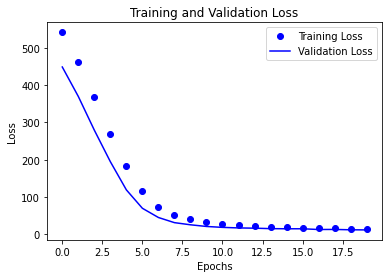

In [7]:
def plot_loss(history):

  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  epochs = history.epoch

  plt.plot(epochs, loss_values, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

plot_loss(history)


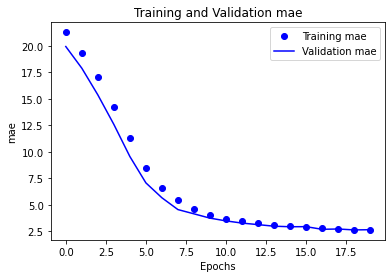

In [8]:
def plot_mae(history):

  history_dict = history.history
  mae_values = history_dict['mae']
  val_mae_values = history_dict['val_mae']
  epochs = history.epoch

  plt.plot(epochs, mae_values, 'bo', label='Training mae')
  plt.plot(epochs, val_mae_values, 'b', label='Validation mae')
  plt.title('Training and Validation mae')
  plt.xlabel('Epochs')
  plt.ylabel('mae')
  plt.legend()

  plt.show()

plot_mae(history)


In [9]:
test_eval_results

[24.306468963623047, 3.4675118923187256]

In [10]:
model.predict(x_test)[1], y_test[1]

(array([16.0197], dtype=float32), 18.8)

Let's do a five fold cross validation

In [30]:
def get_model():
  from keras import models, layers
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))

  model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['mae'])
  
  return model
  
def kfold_cv_train(k=5, epochs=20):
  x_train, y_train, x_test, y_test = prepare_data(train_data, train_targets, test_data, test_targets)

  n = len(x_train)
  def get_dataset_fold(dataset, foldnum, foldlen):
    return (np.concatenate((dataset[:foldlen*foldnum],dataset[foldlen*(foldnum+1):])),
            dataset[foldlen*foldnum : foldlen*(foldnum+1)],
    )

  validation_scores = []
  for fold in range(k):
    training_data, validation_data = get_dataset_fold(x_train, k, n//k)
    training_targets, validation_targets = get_dataset_fold(y_train, k, n//k)
    model = get_model()
    history = model.fit(training_data, training_targets, epochs=epochs, batch_size=32)
    validation_scores.append(model.evaluate(validation_data, validation_targets))
  
  return validation_scores

validation_scores = kfold_cv_train(k=5, epochs=20)

Epoch 1/20
13/13 [==============================] - 0s 1ms/step - loss: 552.9722 - mae: 21.6107
Epoch 2/20
13/13 [==============================] - 0s 1ms/step - loss: 473.1529 - mae: 19.6628
Epoch 3/20
13/13 [==============================] - 0s 1ms/step - loss: 384.1211 - mae: 17.3864
Epoch 4/20
13/13 [==============================] - 0s 1ms/step - loss: 288.3595 - mae: 14.7459
Epoch 5/20
13/13 [==============================] - 0s 1ms/step - loss: 198.4882 - mae: 11.8591
Epoch 6/20
13/13 [==============================] - 0s 1ms/step - loss: 125.2007 - mae: 9.0365
Epoch 7/20
13/13 [==============================] - 0s 987us/step - loss: 77.2911 - mae: 6.9263
Epoch 8/20
13/13 [==============================] - 0s 959us/step - loss: 53.0354 - mae: 5.5118
Epoch 9/20
13/13 [==============================] - 0s 1ms/step - loss: 39.4355 - mae: 4.6400
Epoch 10/20
13/13 [==============================] - 0s 1ms/step - loss: 30.7920 - mae: 3.9900
Epoch 11/20
13/13 [=========================

In [32]:
np.mean(validation_scores, axis=0)

array([6.05933642, 2.09643345])